<a href="https://colab.research.google.com/github/tusharsingh3199/ML-Projects/blob/main/MalariaCellDetection(SimpleModel).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import kagglehub
import os
import glob
import random
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
path = kagglehub.dataset_download("iarunava/cell-images-for-detecting-malaria")
path = path + '/cell_images/cell_images'
print("Path to dataset files:", path)

100%|██████████| 675M/675M [00:31<00:00, 22.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/iarunava/cell-images-for-detecting-malaria/versions/1/cell_images/cell_images


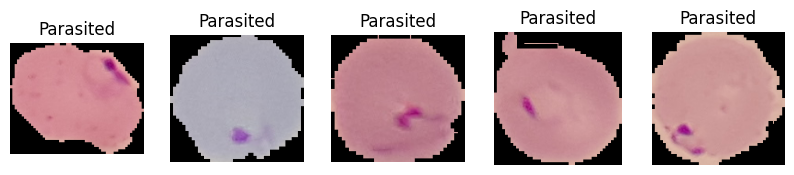

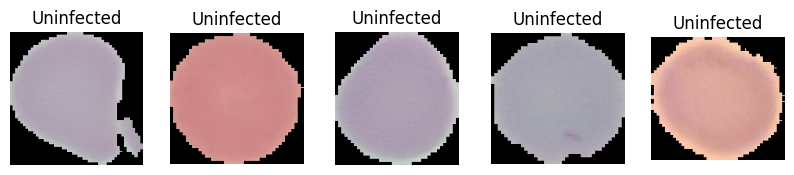

In [ ]:
list_dir = os.listdir(path)
Parasitized_dir = glob.glob(os.path.join(path, 'Parasitized', '*'))
Uninfected_dir = glob.glob(os.path.join(path, 'Uninfected', '*'))

Para_len, Uninf_len = len(Parasitized_dir)-1, len(Uninfected_dir)-1

plt.figure(figsize=(10, 10))
for i in range(1,6):
    plt.subplot(5, 5, i)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(plt.imread(Parasitized_dir[random.randint(0, Para_len)]),cmap=plt.cm.binary)
    plt.title("Parasited")

plt.figure(figsize=(10, 10))
for i in range(1,6):
    plt.subplot(5, 5, i)
    plt.grid(False)
    plt.axis("off")
    plt.imshow(plt.imread(Uninfected_dir[random.randint(0, Uninf_len)]),cmap=plt.cm.binary)
    plt.title("Uninfected")


In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(path, image_size=(224, 224), batch_size=16,
                                          shuffle=True, validation_split=0.2, seed=69, subset="training")

tf.random.set_seed(69)
val_ds = tf.keras.utils.image_dataset_from_directory(path, image_size=(224, 224), batch_size=16,
                                           validation_split=0.2, seed=69, subset="validation")

class_names = train_ds.class_names
print(class_names)

data_augmentation = keras.Sequential([ layers.RandomFlip("horizontal_and_vertical", input_shape=(224, 224, 3)), layers.RandomRotation(0.1),
                                      layers.RandomZoom(0.1), layers.Resizing(224, 224), layers.Rescaling(1./255) ])

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.
['Parasitized', 'Uninfected']


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
BaseModel = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical", input_shape=(224, 224, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Resizing(224, 224),
    layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

BaseModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
BaseModel.summary()

ModelHistory = BaseModel.fit(train_ds, epochs=5, validation_data=val_ds)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip_1 (RandomFlip)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resizing_1 (Resizing)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 60s 39ms/step - accuracy: 0.7603 - loss: 0.4741 - val_accuracy: 0.9554 - val_loss: 0.1551
Epoch 2/5
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 54s 39ms/step - accuracy: 0.9439 - loss: 0.1858 - val_accuracy: 0.9599 - val_loss: 0.1381
Epoch 3/5
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.9494 - loss: 0.1537 - val_accuracy: 0.9619 - val_loss: 0.1257
Epoch 4/5
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 54s 39ms/step - accuracy: 0.9532 - loss: 0.1434 - val_accuracy: 0.9452 - val_loss: 0.1536
Epoch 5/5
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 53s 39ms/step - accuracy: 0.9527 - loss: 0.1413 - val_accuracy: 0.9594 - val_loss: 0.1255


Model already exists.... Skip saving... 


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction:  Parasitized 




(np.float64(-0.5), np.float64(153.5), np.float64(129.5), np.float64(-0.5))

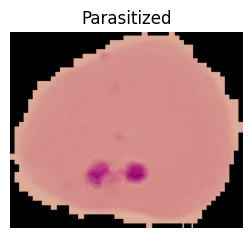

In [ ]:
img_dir = Uninfected_dir[random.randint(0, Uninf_len)]
img_dir = Parasitized_dir[random.randint(0, Para_len)]

img = tf.keras.utils.load_img(img_dir, target_size=(224,224))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

save_path = "MyBaseModel.keras"
if not os.path.exists(save_path):
    BaseModel.save(save_path)
    print(f"Model saved at: {save_path}")
else:
    print("Model already exists.... Skip saving... \n\n")

LoadBaseModel = tf.keras.models.load_model(save_path)

prediction = BaseModel.predict(img_array)
prediction = 0 if prediction[0][0] < 0.5 else 1

Answer = class_names[prediction]
plt.figure(figsize=(3,3))
print("Prediction: ", Answer, "\n\n")
plt.imshow(plt.imread(img_dir), cmap=plt.cm.binary)
plt.grid(False)
plt.title(Answer)
plt.axis("off")

345/345 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9537 - loss: 0.1356
Loss:  0.12550878524780273 
Accuracy:  0.959354043006897


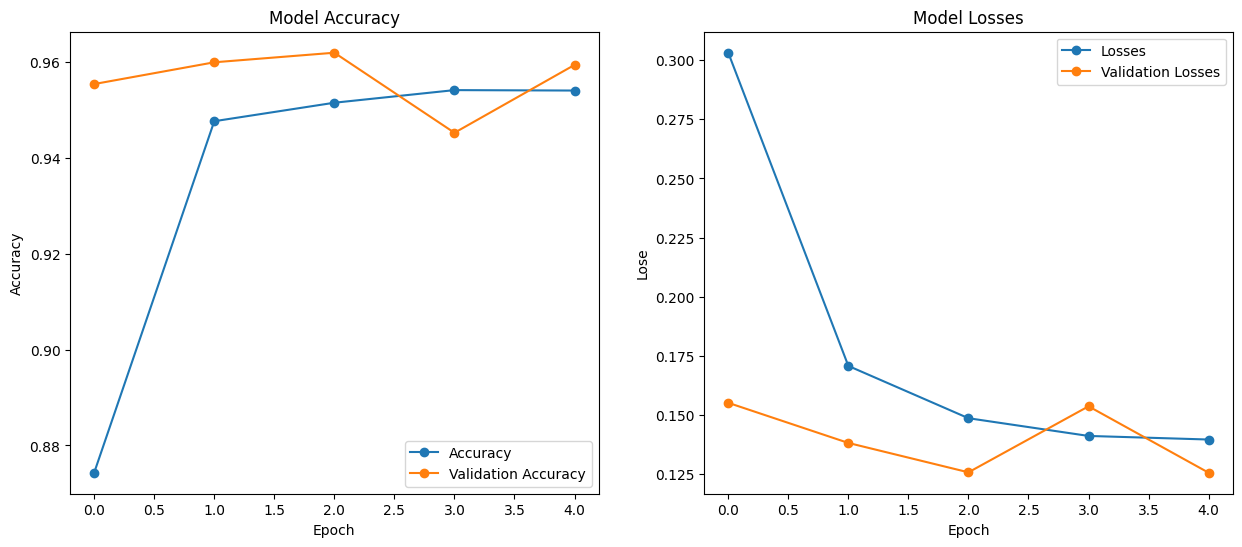

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(ModelHistory.history["accuracy"], marker="o", label="Accuracy", )
plt.plot(ModelHistory.history["val_accuracy"], marker="o", label="Validation Accuracy")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2)
plt.plot(ModelHistory.history["loss"], marker="o", label="Losses")
plt.plot(ModelHistory.history["val_loss"], marker="o", label="Validation Losses")
plt.title("Model Losses")
plt.ylabel("Lose")
plt.xlabel("Epoch")
plt.legend()

loss, accuracy = BaseModel.evaluate(val_ds)
print("Loss: ", loss, "\nAccuracy: ", accuracy)

all_true_labels = []
y_prediction = []

for image, labels in val_ds:
    all_true_labels.extend(labels.numpy())
    y_prediction.extend(BaseModel.predict(image, verbose=0).round())

y_true = np.array(all_true_labels)
y_prediction = np.array(y_prediction).flatten()

              precision    recall  f1-score   support

 Parasitized       0.98      0.94      0.96      2723
  Uninfected       0.94      0.98      0.96      2788

    accuracy                           0.96      5511
   macro avg       0.96      0.96      0.96      5511
weighted avg       0.96      0.96      0.96      5511



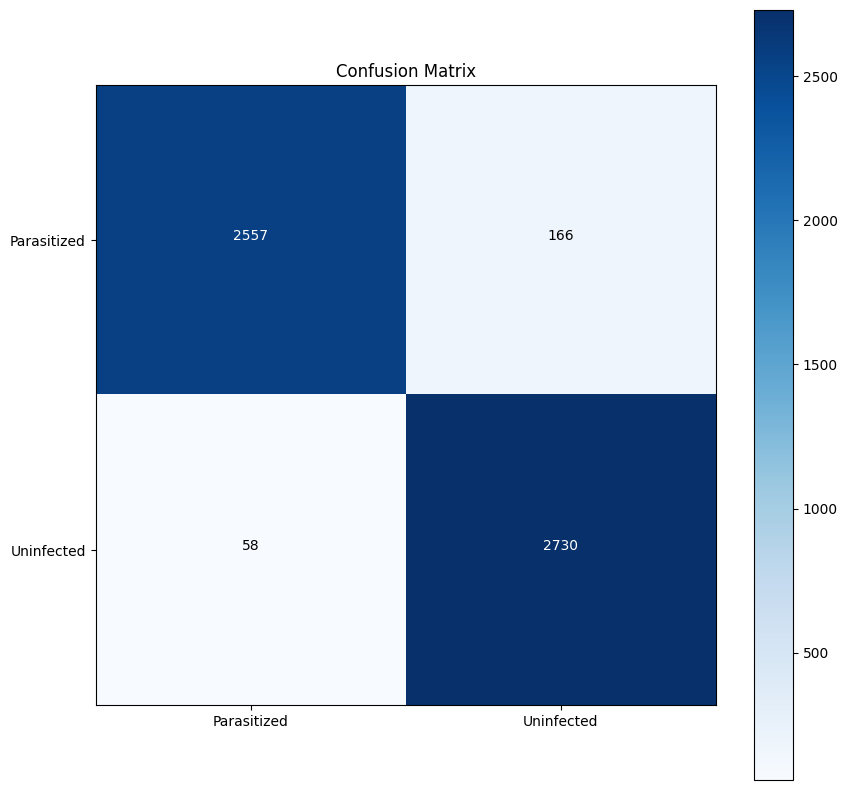

In [ ]:
cm = confusion_matrix(y_true, y_prediction)
plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = class_names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')
print(classification_report(y_true, y_prediction, target_names= classes ))